In [76]:
#In this project we endeavor to find the words that make an ebay posting sell

In [77]:
#Getting the data
ebay <- read.csv('ebay.csv' , header = T , stringsAsFactors = F)

In [78]:
#Summary of the dataset
summary(ebay)


 description           biddable        startprice      condition        
 Length:790         Min.   :0.0000   Min.   :  0.01   Length:790        
 Class :character   1st Qu.:0.0000   1st Qu.: 80.00   Class :character  
 Mode  :character   Median :0.0000   Median :170.50   Mode  :character  
                    Mean   :0.4038   Mean   :186.34                     
                    3rd Qu.:1.0000   3rd Qu.:269.99                     
                    Max.   :1.0000   Max.   :699.95                     
   cellular           carrier             color              storage      
 Length:790         Length:790         Length:790         Min.   : 16.00  
 Class :character   Class :character   Class :character   1st Qu.: 16.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 32.00  
                                                          Mean   : 33.26  
                                                          3rd Qu.: 32.00  
                                       

In [79]:
#Number of records
print(paste("The number of records in the dataset are:" , nrow(ebay)))


[1] "The number of records in the dataset are: 790"


In [80]:
#Inspecting the first few rows
head(ebay,5) #Head of the dataset

description,biddable,startprice,condition,cellular,carrier,color,storage,productline,sold,UniqueID
99%,0,249.99,Used,0,None,Space Gray,16,Unknown,0,11001
#6428,0,124.95,Used,0,None,Unknown,16,iPad 1,0,11207
&#034;Great Working Condition&#034;,1,0.99,Used,1,AT&T,White,16,iPad mini 2,1,10657
"*FREE* Same-Day Ship | 90-Day Warranty | 100% Functional, Includes All Major Accessories, Shows",0,200.29,Seller refurbished,0,None,Black,16,iPad 3,0,10949
*Great condition*Minimal use*Case included,0,199.99,Used,Unknown,Unknown,Unknown,16,iPad 1,0,11305


In [81]:
#Inspecting the last few rows of the dataset

tail(ebay,5) 

,description,biddable,startprice,condition,cellular,carrier,color,storage,productline,sold,UniqueID
786,VERY GOOD CONDITION. VERY LITTLE TO NO SCRATCHES. PROTECTIVE CASE HAS A LITTLE WEAR ON CORNERS (SEE,1,229.95,Used,Unknown,Unknown,Unknown,32,Unknown,0,11311
787,"Water damage, broken. See full description for details",0,80.00,For parts or not working,Unknown,Unknown,Unknown,32,iPad 2,1,11725
788,Working condition!,1,100.00,Used,Unknown,Unknown,Black,32,Unknown,1,10389
789,Works great!,0,8.00,Used,Unknown,Unknown,Unknown,32,iPad 4,1,11581
790,Works like new.,1,45.00,Used,Unknown,Unknown,Unknown,32,Unknown,1,11332


In [82]:
#Inspecting the structure of the dataset
str(ebay)


'data.frame':	790 obs. of  11 variables:
 $ description: chr  "99%" "#6428" "&#034;Great Working Condition&#034;" "*FREE* Same-Day Ship | 90-Day Warranty | 100% Functional, Includes All Major Accessories, Shows " ...
 $ biddable   : int  0 0 1 0 0 0 0 0 0 0 ...
 $ startprice : num  249.99 124.95 0.99 200.29 199.99 ...
 $ condition  : chr  "Used" "Used" "Used" "Seller refurbished" ...
 $ cellular   : chr  "0" "0" "1" "0" ...
 $ carrier    : chr  "None" "None" "AT&T" "None" ...
 $ color      : chr  "Space Gray" "Unknown" "White" "Black" ...
 $ storage    : int  16 16 16 16 16 16 16 16 16 16 ...
 $ productline: chr  "Unknown" "iPad 1" "iPad mini 2" "iPad 3" ...
 $ sold       : int  0 0 1 0 0 1 0 0 0 1 ...
 $ UniqueID   : int  11001 11207 10657 10949 11305 11514 10665 10877 11849 10068 ...


In [83]:
#Converting the condition to a factor
unique(ebay$condition)
ebay$condition <- as.factor(ebay$condition)

[1] "Used"                     "Seller refurbished"      
[3] "Manufacturer refurbished" "New other (see details)" 
[5] "For parts or not working"

In [84]:
#Inspecting the color column 
class(ebay$color)
unique(ebay$color)
ebay$color = as.factor(ebay$color) #Conversion to factor

[1] "character"

[1] "Space Gray" "Unknown"    "White"      "Black"      "Gold"

In [85]:
#Inspecting for missing values 
print(paste("Number of records with no missing values is:",sum(complete.cases(ebay))))


[1] "Number of records with no missing values is: 790"


In [86]:
#Since the complete cases are same as the number of records we 
#can conclude that no records have missing values


In [87]:
#checking which columns are character
head(ebay[,which((sapply(ebay , is.character))==T)])

description,cellular,carrier,productline
99%,0,None,Unknown
#6428,0,None,iPad 1
&#034;Great Working Condition&#034;,1,AT&T,iPad mini 2
"*FREE* Same-Day Ship | 90-Day Warranty | 100% Functional, Includes All Major Accessories, Shows",0,None,iPad 3
*Great condition*Minimal use*Case included,Unknown,Unknown,iPad 1
‰ÛÏGrade A condition means that the Ipad is 100% working condition. Cosmetically 8/9 out of 10 - Will,1,Verizon,iPad mini


In [88]:
#checking the number of unique values in all columns 
sapply(sapply(ebay , table) , length)

description    biddable  startprice   condition    cellular     carrier 
        674           2         326           5           3           7 
      color     storage productline        sold    UniqueID 
          5           4          11           2         790

In [89]:
#Summary of the price column
summary(ebay$startprice)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.01   80.00  170.50  186.34  269.99  699.95 

In [90]:
#creating a new price class column 
ebay$price_class <- ifelse(ebay$startprice<median(ebay$startprice) , 0,1)
table(ebay$price_class) #The num of values in both classes are equal


  0   1 
395 395 

In [91]:
#Inspecting the dataset structure again 
str(ebay)

'data.frame':	790 obs. of  12 variables:
 $ description: chr  "99%" "#6428" "&#034;Great Working Condition&#034;" "*FREE* Same-Day Ship | 90-Day Warranty | 100% Functional, Includes All Major Accessories, Shows " ...
 $ biddable   : int  0 0 1 0 0 0 0 0 0 0 ...
 $ startprice : num  249.99 124.95 0.99 200.29 199.99 ...
 $ condition  : Factor w/ 5 levels "For parts or not working",..: 5 5 5 4 5 2 4 5 5 4 ...
 $ cellular   : chr  "0" "0" "1" "0" ...
 $ carrier    : chr  "None" "None" "AT&T" "None" ...
 $ color      : Factor w/ 5 levels "Black","Gold",..: 3 4 5 1 4 1 1 1 5 1 ...
 $ storage    : int  16 16 16 16 16 16 16 16 16 16 ...
 $ productline: chr  "Unknown" "iPad 1" "iPad mini 2" "iPad 3" ...
 $ sold       : int  0 0 1 0 0 1 0 0 0 1 ...
 $ UniqueID   : int  11001 11207 10657 10949 11305 11514 10665 10877 11849 10068 ...
 $ price_class: num  1 0 0 1 1 1 0 1 0 0 ...


In [92]:
#Converting columns to factors 
ebay$carrier = as.factor(ebay$carrier)
ebay$storage = paste(ebay$storage , "GB")
ebay$storage = as.factor(ebay$storage)
ebay$productline = as.factor(ebay$productline)
ebay$cellular = as.factor(ebay$cellular)






In [93]:
#Inspecting the dataset structure again 
str(ebay)

'data.frame':	790 obs. of  12 variables:
 $ description: chr  "99%" "#6428" "&#034;Great Working Condition&#034;" "*FREE* Same-Day Ship | 90-Day Warranty | 100% Functional, Includes All Major Accessories, Shows " ...
 $ biddable   : int  0 0 1 0 0 0 0 0 0 0 ...
 $ startprice : num  249.99 124.95 0.99 200.29 199.99 ...
 $ condition  : Factor w/ 5 levels "For parts or not working",..: 5 5 5 4 5 2 4 5 5 4 ...
 $ cellular   : Factor w/ 3 levels "0","1","Unknown": 1 1 2 1 3 2 2 1 1 2 ...
 $ carrier    : Factor w/ 7 levels "AT&T","None",..: 2 2 1 2 6 7 7 2 2 1 ...
 $ color      : Factor w/ 5 levels "Black","Gold",..: 3 4 5 1 4 1 1 1 5 1 ...
 $ storage    : Factor w/ 4 levels "128 GB","16 GB",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ productline: Factor w/ 11 levels "iPad 1","iPad 2",..: 11 1 8 3 1 7 2 5 2 1 ...
 $ sold       : int  0 0 1 0 0 1 0 0 0 1 ...
 $ UniqueID   : int  11001 11207 10657 10949 11305 11514 10665 10877 11849 10068 ...
 $ price_class: num  1 0 0 1 1 1 0 1 0 0 ...


In [94]:

#Converting all integer columns to numeric
for (i in which((sapply(ebay , class))=="integer")){
  ebay[,i] = as.numeric(ebay[,i])
}

In [95]:
#max values of all the numerical columns 
sapply(ebay[,which((sapply(ebay , class))=="numeric")] , max)

biddable  startprice        sold    UniqueID price_class 
       1.00      699.95        1.00    11861.00        1.00

In [96]:
#Finding the most common category in the factors
#Writing a function to return the mode
return_max_cat = function(a){
  (sort(table(a) , decreasing = T))[1]
}

In [97]:
#Proportion of categories in each factor 
sapply(ebay[,which((sapply(ebay , class))=="factor")] , table)


$condition

For parts or not working Manufacturer refurbished  New other (see details) 
                      93                       17                       47 
      Seller refurbished                     Used 
                      73                      560 

$cellular

      0       1 Unknown 
    445     246      99 

$carrier

    AT&T     None    Other   Sprint T-Mobile  Unknown  Verizon 
     111      448        2        9       11      134       75 

$color

     Black       Gold Space Gray    Unknown      White 
       177         20         59        340        194 

$storage

128 GB  16 GB  32 GB  64 GB 
    27    372    255    136 

$productline

          iPad 1           iPad 2           iPad 3           iPad 4 
             104              149               82               84 
        iPad Air       iPad Air 2        iPad mini      iPad mini 2 
              87               44              104               37 
     iPad mini 3 iPad mini Retina          Unknown 


In [98]:

#Convering to data.table
library(data.table)
ebaydt = data.table(ebay)
#mean price according to start and biddable 
ebaydt[1:nrow(ebaydt),by = list(sold , biddable),mean(startprice)]

sold,biddable,V1
0,0,257.48507
1,1,70.88996
1,0,198.30396
0,1,197.71155


In [99]:
#mean and std dev of numerical variables 
num_var_data = ebay[,which((sapply(ebay , class))=='numeric')]

sapply(num_var_data,mean)


sapply(num_var_data,sd)

biddable   startprice         sold     UniqueID  price_class 
4.037975e-01 1.863447e+02 4.354430e-01 1.093411e+04 5.000000e-01

biddable  startprice        sold    UniqueID price_class 
  0.4909686 139.6412163   0.4961290 546.0455398   0.5003168

In [100]:
#tapply function

tapply(ebay$startprice , ebay$biddable , mean)
#or
ebaydt[1:nrow(ebaydt) , by = list(biddable) , mean(startprice)]


0         1 
245.42268  99.11671

biddable,V1
0,245.42268
1,99.11671


In [101]:
#data manipulation using dplyr


#Selecting a few columns 

select(ebay , startprice , condition , sold)[1:5,]

startprice,condition,sold
249.99,Used,0
124.95,Used,0
0.99,Used,1
200.29,Seller refurbished,0
199.99,Used,0


In [102]:
#Selecting a range of columns
select(ebay , biddable:sold)[1:5,]


biddable,startprice,condition,cellular,carrier,color,storage,productline,sold
0,249.99,Used,0,None,Space Gray,16 GB,Unknown,0
0,124.95,Used,0,None,Unknown,16 GB,iPad 1,0
1,0.99,Used,1,AT&T,White,16 GB,iPad mini 2,1
0,200.29,Seller refurbished,0,None,Black,16 GB,iPad 3,0
0,199.99,Used,Unknown,Unknown,Unknown,16 GB,iPad 1,0


In [103]:
#Mutate in R
library(stringr)
ebay = ebay%>%mutate(storage_num = as.numeric(str_sub(storage , 1 , 2)))%>%
  mutate(var1 = storage_num/startprice)

In [104]:
#arrange
arrange(ebay , desc(startprice)  )[1:5,]

description,biddable,startprice,condition,cellular,carrier,color,storage,productline,sold,UniqueID,price_class,storage_num,var1
Manufacture refurbished to like new conditions. Apple warranty until September 2015,0,699.95,Manufacturer refurbished,0,None,Black,64 GB,iPad 3,0,10601,1,64,0.09143510
display unit,0,699.00,New other (see details),1,Unknown,Unknown,128 GB,iPad Air,0,11034,1,12,0.01716738
"*** Like new, Apple iPad Air 2 Gold 128GB. Comes with AC adapter and lightning cable.",0,619.99,Seller refurbished,0,None,Space Gray,128 GB,iPad Air 2,0,11183,1,12,0.01935515
2 scratches. In good condition,0,600.00,Used,1,AT&T,Black,128 GB,iPad 3,0,11148,1,12,0.02000000
"Pristine Condition(9.5/10), is very clean with no scratches, dents, or screen imperfections. Unit",0,589.00,Used,0,None,Gold,128 GB,iPad Air 2,0,11355,1,12,0.02037351


In [105]:
#Group and arrange
ebay%>%group_by(condition , biddable)%>%summarise(mean_price = mean(startprice))%>%arrange(mean_price)

ebay%>%group_by(biddable , sold )%>%summarise(mean_price = mean(startprice))

condition,biddable,mean_price
Seller refurbished,1,43.80562
For parts or not working,1,46.97143
Manufacturer refurbished,1,99.99000
Used,1,107.55428
For parts or not working,0,112.95364
New other (see details),1,184.29059
Seller refurbished,0,236.76526
Used,0,248.95364
Manufacturer refurbished,0,317.70938
New other (see details),0,379.47233


biddable,sold,mean_price
0,0,257.48507
0,1,198.30396
1,0,197.71155
1,1,70.88996


In [106]:
#filtering data
notbought = filter(ebay , sold==0)

#Arranging data
(notbought%>%arrange(condition,sold))[1:5,]

description,biddable,startprice,condition,cellular,carrier,color,storage,productline,sold,UniqueID,price_class,storage_num,var1
a icloud lock that&#039;s why im selling it for parts as-is. The ipad has signs of use such as few,1,160.00,For parts or not working,0,None,Unknown,16 GB,iPad 2,0,11685,0,16,0.1000000
BROKEN DEVICE: Problem with Apple ID,1,149.98,For parts or not working,0,None,Unknown,16 GB,iPad 4,0,11683,0,16,0.1066809
BROKEN: Device has at least one or more problems: For Parts or Repair,0,36.95,For parts or not working,0,None,Unknown,16 GB,iPad 1,0,11844,0,16,0.4330176
Cracked but works read first before buying,0,155.00,For parts or not working,0,None,White,16 GB,iPad mini 2,0,11768,0,16,0.1032258
For Parts Or Repair,0,85.00,For parts or not working,0,None,Black,16 GB,iPad 2,0,11756,0,16,0.1882353


In [107]:
#Summarize 

summarise(ebay , mean_ = mean(startprice) , median_ = median(startprice))

mean_,median_
186.3447,170.5


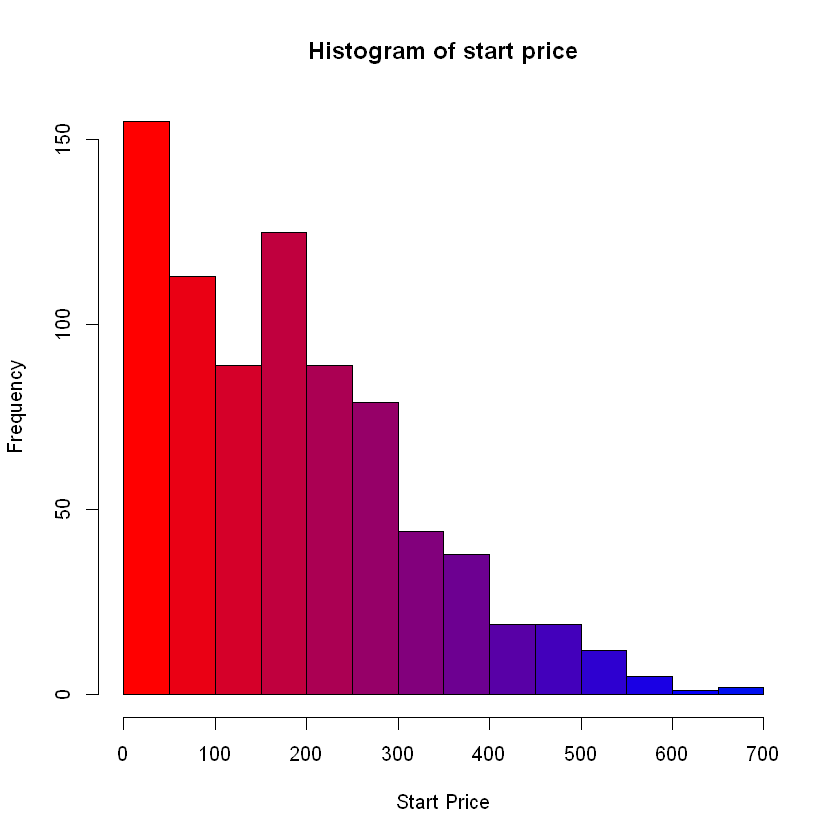

In [108]:
#Visualisations 
#color ramp palette
crp = colorRampPalette(c("red" , "blue" , "green" , "yellow" , "orange"))

#Histogram of Price
hist(ebay$startprice , col = crp(50) , breaks = 20 , 
     xlab = "Start Price"  , main = "Histogram of start price")



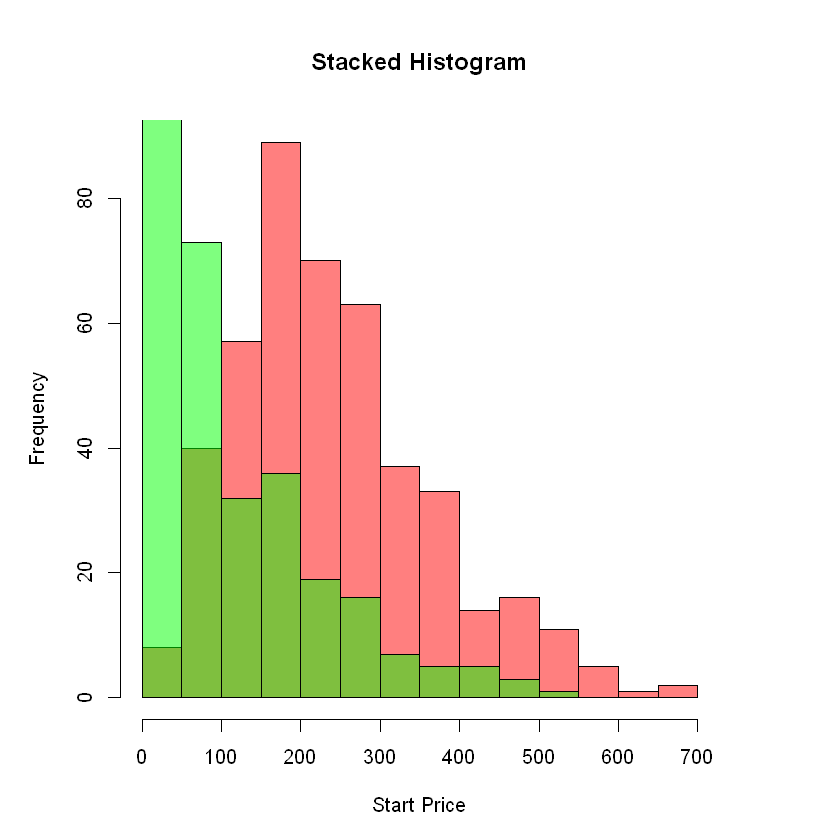

In [109]:

#Building a stacked histogram 
par(mar = c(5,5,5,5))
hist(ebay$startprice[ebay$sold==0] , col = rgb(1,0,0,0.5) , 
     xlab = "Start Price" , main = "Stacked Histogram")
hist(ebay$startprice[ebay$sold==1] , add = T , col = rgb(0,1,0,0.5))
#It is seen that the products with lower price have sold more



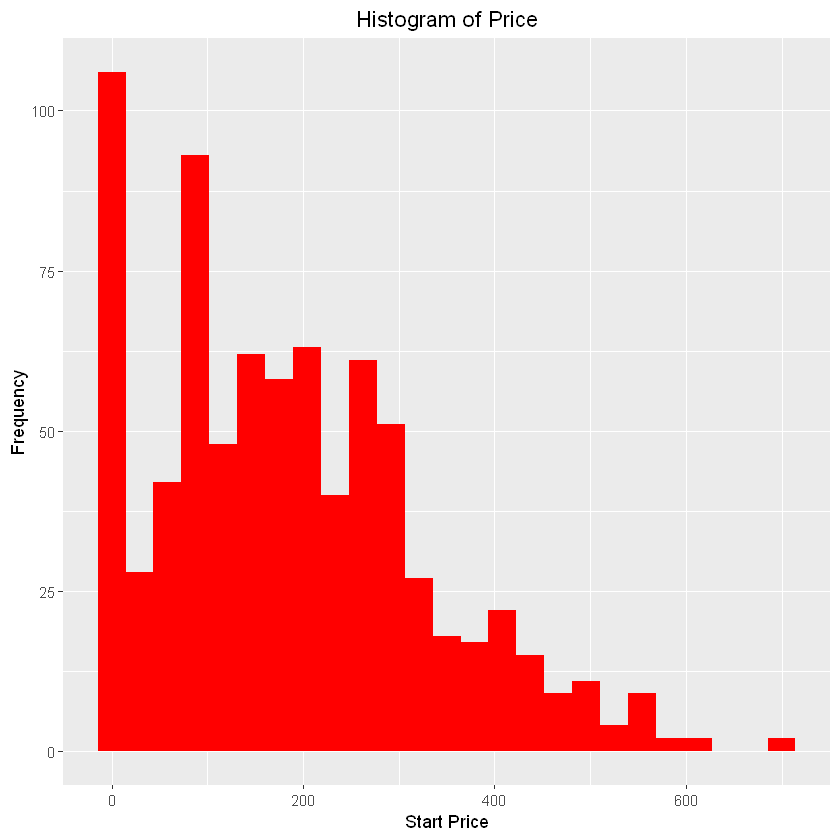

In [110]:
#Visualisations with ggplot
library(ggplot2)
ggplot(ebay , aes(x = ebay$startprice))+geom_histogram(bins = 25 , fill = "red")+
  labs(x = "Start Price" , y = "Frequency" , title = "Histogram of Price")+
  theme(plot.title = element_text(hjust = 0.5))



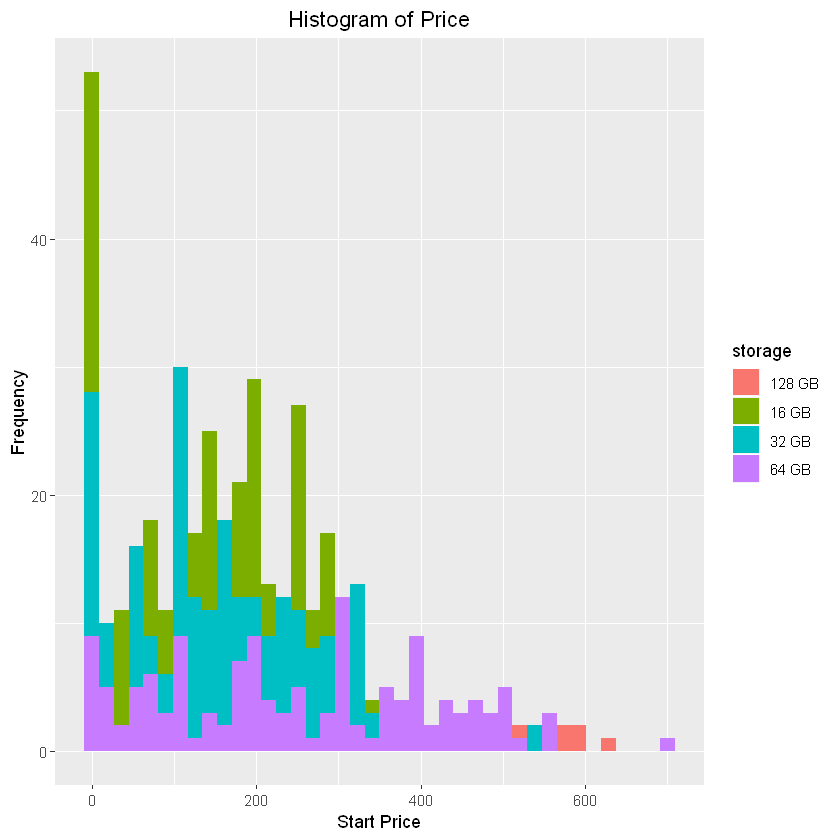

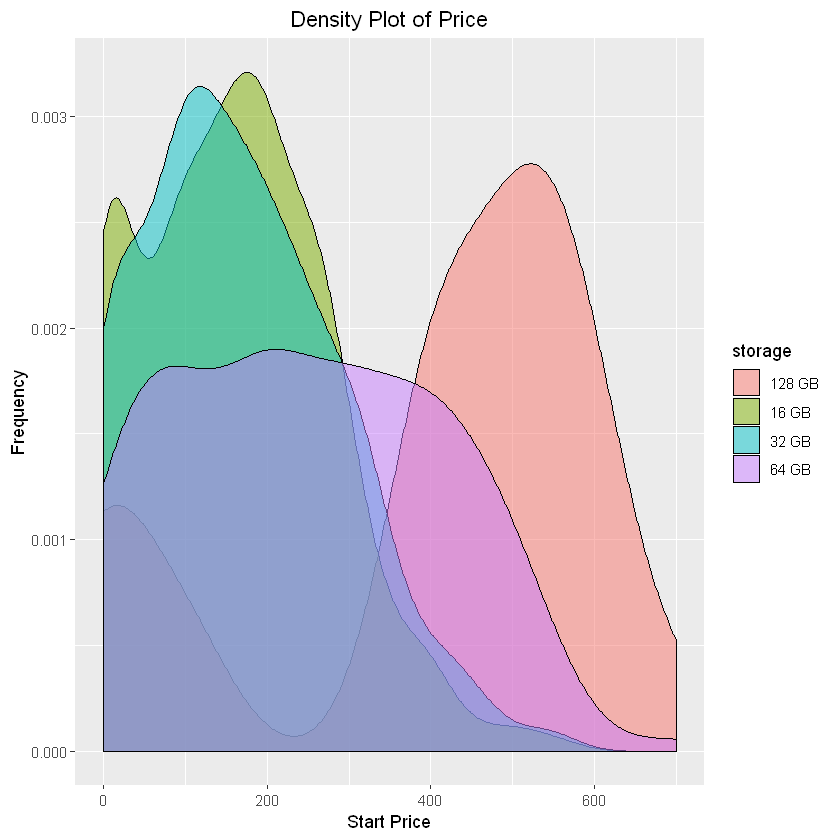

In [111]:

#Stacked histogram in ggplot2
ggplot(ebay , aes(x =startprice , fill = storage))+geom_histogram(position = "identity" , bins = 40)+
  labs(x = "Start Price" , y = "Frequency" , title = "Histogram of Price" , series = "Price Class")+ 
  theme(plot.title = element_text(hjust = 0.5))

#Density Plot
ggplot(ebay , aes(x =startprice , fill = storage))+geom_density(position = "identity" ,alpha = 0.5)+
labs(x = "Start Price" , y = "Frequency" , title = "Density Plot of Price" , series = "Price Class")+ 
  theme(plot.title = element_text(hjust = 0.5))
#We clearly see that products with high storage are very expensive






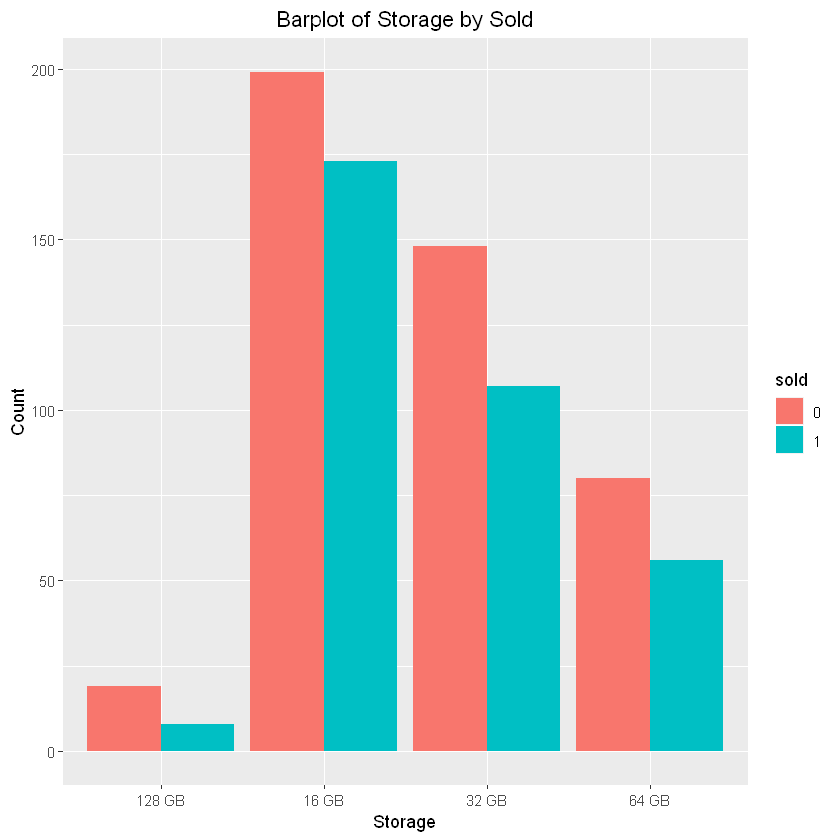

In [112]:
#Barplots 
ebay$sold = as.character(ebay$sold)
ggplot(ebay , aes(x = storage , fill =sold ))+geom_bar(position = "dodge")+
  labs(x = "Storage" , y = "Count" , title = "Barplot of Storage by Sold" )+ 
  theme(plot.title = element_text(hjust = 0.5))
#we see that in the the categories the unsold number is more than the sold 



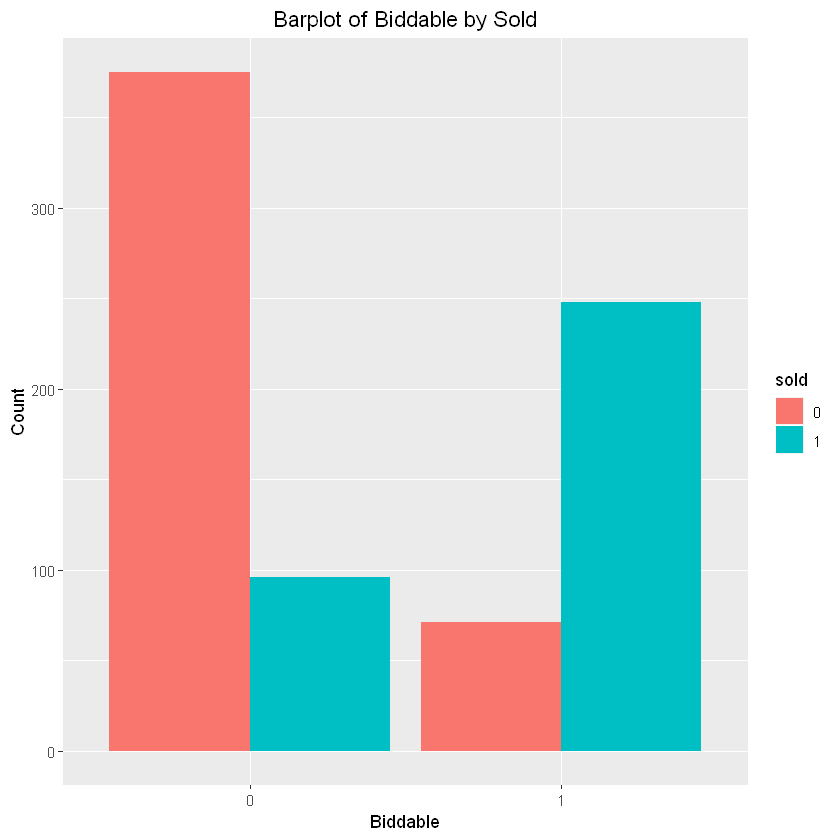

In [113]:
#barplot of biddable by sold 
ebay$biddable = as.character(ebay$biddable)
ggplot(ebay , aes(x = biddable , fill =sold ))+geom_bar(position = "dodge")+
  labs(x = "Biddable" , y = "Count" , title = "Barplot of Biddable by Sold" )+ 
  theme(plot.title = element_text(hjust = 0.5))
#it is seen that more products were sold in auction 



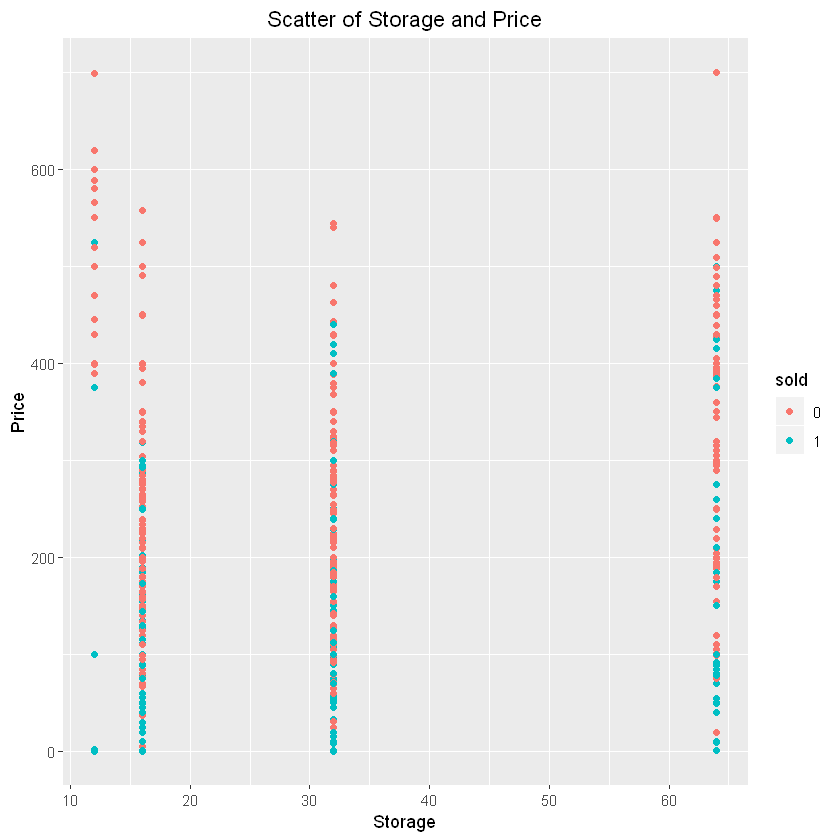

In [114]:


#Scatter plot 
ggplot(ebay , aes(x = storage_num , y = startprice , col = sold))+geom_point()+
  labs(x = "Storage" , y = "Price" , title = "Scatter of Storage and Price" )+ 
  theme(plot.title = element_text(hjust = 0.5))
#we see that cheaper products have sold more

In [115]:
#Text Mining 
#Text Mining the whole dataset 

text_to_mine = ebay$description
text_to_mine = enc2native(text_to_mine)


library(tm)
library(stringr)

vector_source = VectorSource(text_to_mine)
text_corpus = Corpus(vector_source)

In [116]:
#Inspecting a few elements of the corpus
text_corpus[[1]][1]
text_corpus[[5]][1]
text_corpus[[50]][1]

$content
[1] "99%"

$content
[1] "*Great condition*Minimal use*Case included"

$content
[1] "C - Stock. Seller refurbished &amp; in Fair cosmetic condition. 100% Fully Functional, Clean IMEI &amp; "

In [117]:
#Cleansing text
text_corpus = text_corpus%>%tm_map(removePunctuation)
text_corpus = text_corpus%>%tm_map(removeNumbers)
text_corpus = text_corpus%>%tm_map(stripWhitespace)
text_corpus = text_corpus%>%tm_map(stripWhitespace)
text_corpus = text_corpus%>%tm_map(tolower)
text_corpus = text_corpus%>%tm_map(removeWords , stopwords("en"))


In [118]:
#Once again Inspecting a few elements of the corpus
text_corpus[[1]][1]
text_corpus[[5]][1]
text_corpus[[50]][1]

$content
[1] ""

$content
[1] "great conditionminimal usecase included"

$content
[1] "c stock seller refurbished amp  fair cosmetic condition fully functional clean imei amp "

In [119]:
#Document Term matrix 
doc_term_matrix = as.matrix(DocumentTermMatrix(text_corpus))

#Creating the words and frequency df
frequency = colSums(doc_term_matrix)
frequency = sort(frequency , decreasing = T)
words =  names(frequency)
WordFrequency = data.frame(Word = words , Frequency = frequency)
head(WordFrequency , 5)

,Word,Frequency
condition,condition,340
scratches,scratches,178
ipad,ipad,176
used,used,173
screen,screen,150


In [120]:
#Creating the world cloud 

library(wordcloud2)



In [121]:
wordcloud2(WordFrequency[1:100 , ])

HTML widgets cannot be represented in plain text (need html)

In [122]:
#Text Mining the whole descriptions of products that sold
sold_ebay = subset(ebay , sold ==1)
colnames(sold_ebay)
sold_text_to_mine = sold_ebay$description
sold_text_to_mine = enc2native(sold_text_to_mine)

sold_vector_source = VectorSource(sold_text_to_mine)
sold_text_corpus = Corpus(sold_vector_source)



#Cleansing text
sold_text_corpus = sold_text_corpus%>%tm_map(removePunctuation)
sold_text_corpus = sold_text_corpus%>%tm_map(removeNumbers)
sold_text_corpus = sold_text_corpus%>%tm_map(stripWhitespace)
sold_text_corpus = sold_text_corpus%>%tm_map(stripWhitespace)
sold_text_corpus = sold_text_corpus%>%tm_map(tolower)
sold_text_corpus = sold_text_corpus%>%tm_map(removeWords , stopwords("en"))



#Document Term matrix 
sold_doc_term_matrix = as.matrix(DocumentTermMatrix(sold_text_corpus))

#Creating the words and frequency df
soldfrequency = colSums(sold_doc_term_matrix)
soldfrequency = sort(soldfrequency , decreasing = T)
soldwords =  names(soldfrequency)
SoldWordFrequency = data.frame(Word = soldwords , Frequency = soldfrequency)
head(SoldWordFrequency , 5)

#Creating the world cloud 


wordcloud2(SoldWordFrequency[1:100 , ])

[1] "description" "biddable"    "startprice"  "condition"   "cellular"   
 [6] "carrier"     "color"       "storage"     "productline" "sold"       
[11] "UniqueID"    "price_class" "storage_num" "var1"

,Word,Frequency
condition,condition,117
scratches,scratches,81
used,used,77
ipad,ipad,75
screen,screen,73


HTML widgets cannot be represented in plain text (need html)

In [123]:
#Text Mining the whole descriptions of products that never  sold
unsold_ebay = subset(ebay , sold ==0)
colnames(unsold_ebay)
unsold_text_to_mine = unsold_ebay$description
unsold_text_to_mine = enc2native(unsold_text_to_mine)


unsold_vector_source = VectorSource(unsold_text_to_mine)
unsold_text_corpus = Corpus(unsold_vector_source)
unsold_text_corpus

#Cleansing text
unsold_text_corpus = unsold_text_corpus%>%tm_map(removePunctuation)
unsold_text_corpus = unsold_text_corpus%>%tm_map(removeNumbers)
unsold_text_corpus = unsold_text_corpus%>%tm_map(stripWhitespace)
unsold_text_corpus = unsold_text_corpus%>%tm_map(stripWhitespace)
unsold_text_corpus = unsold_text_corpus%>%tm_map(tolower)
unsold_text_corpus = unsold_text_corpus%>%tm_map(removeWords , stopwords("en"))



#Document Term matrix 
unsold_doc_term_matrix = as.matrix(DocumentTermMatrix(unsold_text_corpus))

#Creating the words and frequency df
unsoldfrequency = colSums(unsold_doc_term_matrix)
unsoldfrequency = sort(unsoldfrequency , decreasing = T)
unsoldwords =  names(unsoldfrequency)
UnSoldWordFrequency = data.frame(Word = unsoldwords , Frequency = unsoldfrequency)
head(UnSoldWordFrequency , 5)

#Creating the world cloud 
library(wordcloud2)

wordcloud2(UnSoldWordFrequency[1:100 , ])




[1] "description" "biddable"    "startprice"  "condition"   "cellular"   
 [6] "carrier"     "color"       "storage"     "productline" "sold"       
[11] "UniqueID"    "price_class" "storage_num" "var1"

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 446

,Word,Frequency
condition,condition,223
ipad,ipad,101
scratches,scratches,97
used,used,96
good,good,80


HTML widgets cannot be represented in plain text (need html)